In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # 그래프

# 1. 데이터 불러오기 및 확인

## 1-1 파일 불러오기

In [117]:
df = pd.read_csv("Preprocessed_ObesityDataSet1.csv")
df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad,BMI
0,0,21,1.62,64.0,0,0,2,3,2,0,...,0,1,3,0,0,0,1,0,1,24.386526
1,0,21,1.52,56.0,0,0,3,3,2,1,...,3,0,2,0,0,0,1,0,1,24.238227
2,1,23,1.80,77.0,0,0,2,3,2,0,...,2,1,1,0,0,0,1,0,1,23.765432


In [118]:
df.tail(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad,BMI
2108,0,23,1.752,133.7,0,1,3,3,2,0,...,1,1,2,0,0,0,1,0,6,43.557526
2109,0,24,1.739,133.3,0,1,3,3,2,0,...,1,1,2,0,0,0,1,0,6,44.078924
2110,0,24,1.739,133.5,0,1,3,3,2,0,...,1,1,2,0,0,0,1,0,6,44.145059


In [119]:
df.duplicated().sum()

47

## 1-2 데이터 확인하기

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   int64  
 7   NCP                             2111 non-null   int64  
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   int64  
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [81]:
# featureDF = df.iloc[:,:-2]
# targetDF = df.iloc[:,-2]

In [82]:
df.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,...,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.315964,1.701669,86.585978,0.182378,0.883941,2.423496,2.687826,1.859308,0.020843,...,1.006632,0.664614,2.268593,0.216485,0.003316,0.005211,0.748460,0.026528,3.112269,29.700395
std,0.500083,6.357078,0.093311,26.191165,0.386247,0.320371,0.583905,0.809680,0.468543,0.142893,...,0.895462,0.674009,0.515498,0.411946,0.057502,0.072015,0.434001,0.160737,1.985062,8.011182
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.989340
25%,0.000000,20.000000,1.630000,65.450000,0.000000,1.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,24.325802
50%,1.000000,23.000000,1.700000,83.000000,0.000000,1.000000,2.000000,3.000000,2.000000,0.000000,...,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,28.719723
75%,1.000000,26.000000,1.768000,107.450000,0.000000,1.000000,3.000000,3.000000,2.000000,0.000000,...,2.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,36.007628
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,...,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,50.820275


In [83]:
df.corrwith(df["NObeyesdad"])

Gender                           -0.031464
Age                               0.284082
Height                            0.133594
Weight                            0.913240
family_history_with_overweight   -0.505148
FAVC                              0.247793
FCVC                              0.195705
NCP                               0.020931
CAEC                              0.329350
SMOKE                             0.003442
CH2O                              0.138171
SCC                              -0.194508
FAF                              -0.197186
TUE                              -0.079528
CALC                             -0.151752
MTRANS_Automobile                -0.024520
MTRANS_Bike                      -0.036479
MTRANS_Motorbike                 -0.037247
MTRANS_Public_Transportation      0.085606
MTRANS_Walking                   -0.138564
NObeyesdad                        1.000000
BMI                               0.977822
dtype: float64

In [84]:
df.corrwith(df["NObeyesdad"], method="spearman") # Height는 제곱으로 들어가지만 Weight는 직접적으로 들어가서 영향을 많이 미침 

Gender                           -0.037011
Age                               0.409386
Height                            0.126913
Weight                            0.921325
family_history_with_overweight   -0.500264
FAVC                              0.249962
FCVC                              0.207816
NCP                              -0.018456
CAEC                              0.352752
SMOKE                             0.003250
CH2O                              0.137553
SCC                              -0.194482
FAF                              -0.190270
TUE                              -0.059823
CALC                             -0.168379
MTRANS_Automobile                -0.029200
MTRANS_Bike                      -0.036622
MTRANS_Motorbike                 -0.037927
MTRANS_Public_Transportation      0.090331
MTRANS_Walking                   -0.138972
NObeyesdad                        1.000000
BMI                               0.988006
dtype: float64

In [85]:
# 연관성이 너무 높은 Weight drop
df = df.drop(["Weight", "BMI"], axis=True)

# 2. 데이터 전처리

## 2-1. 이상치 확인하기

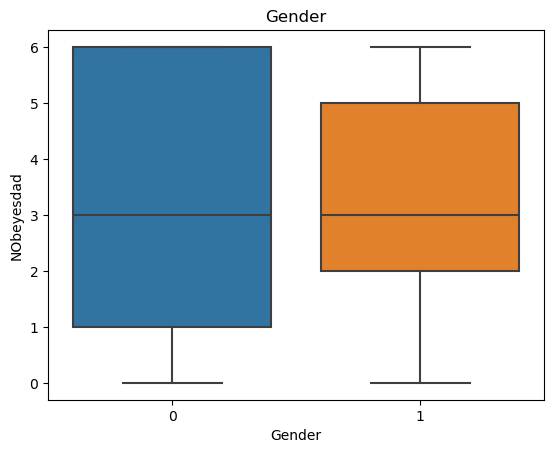

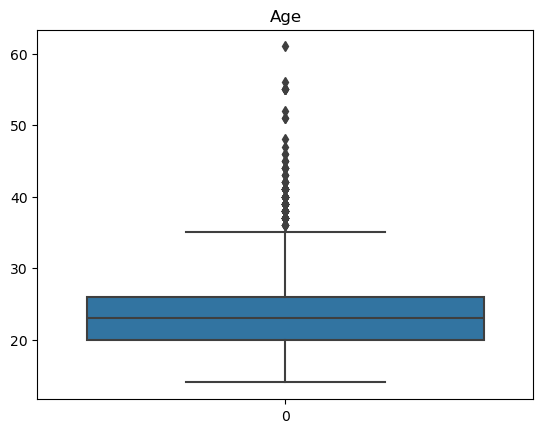

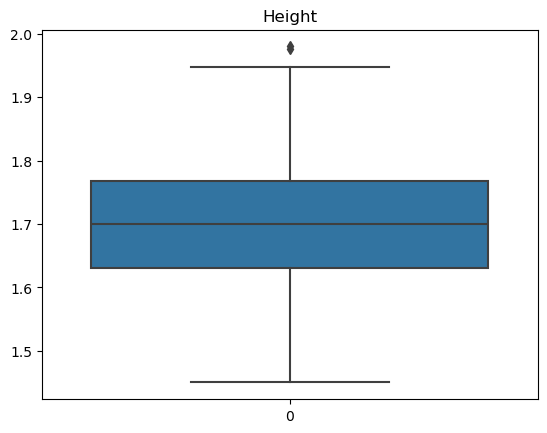

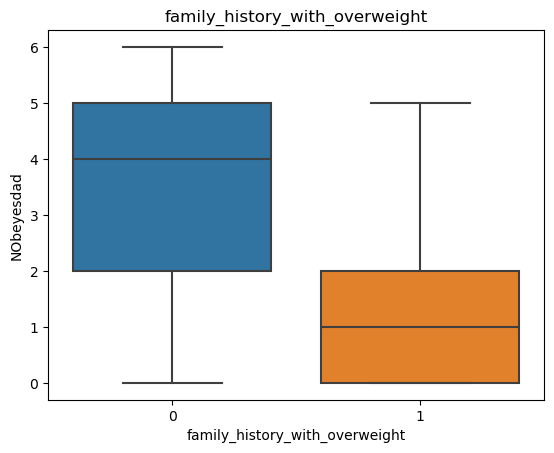

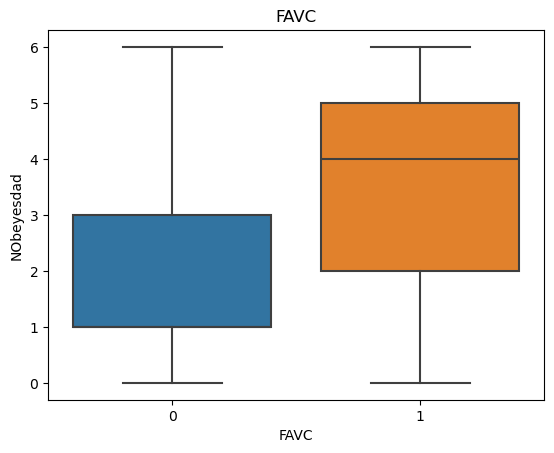

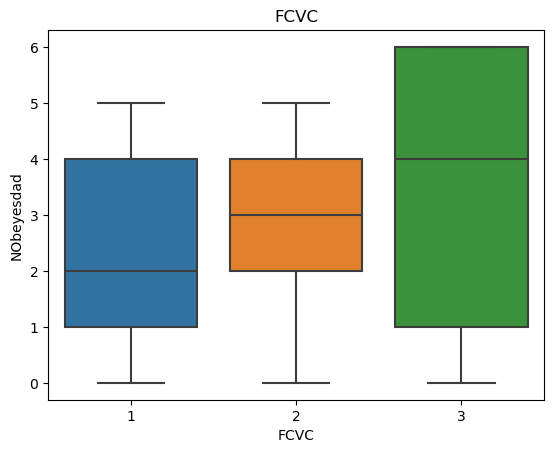

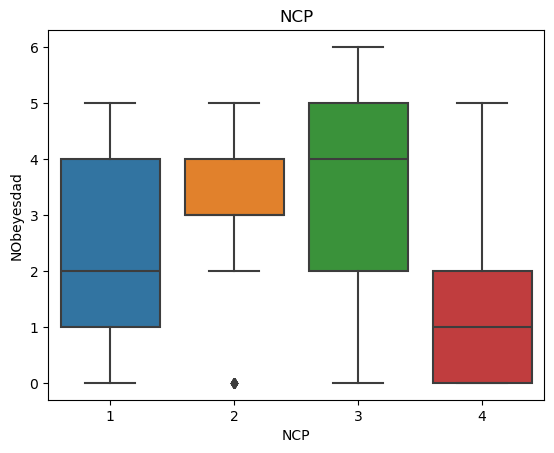

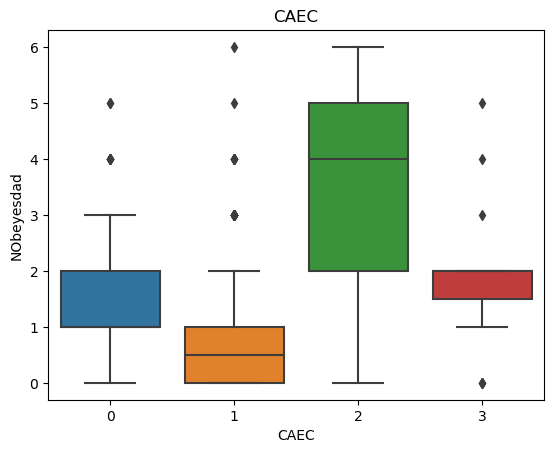

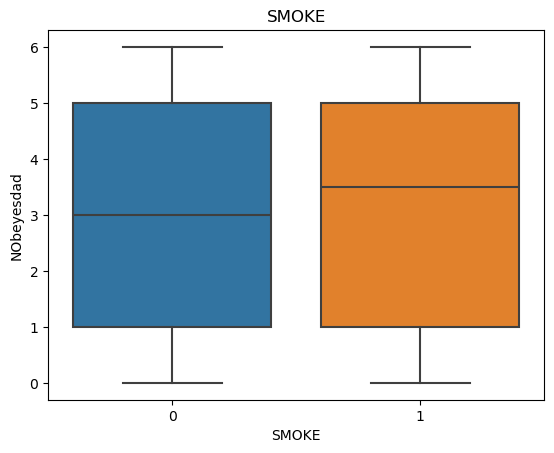

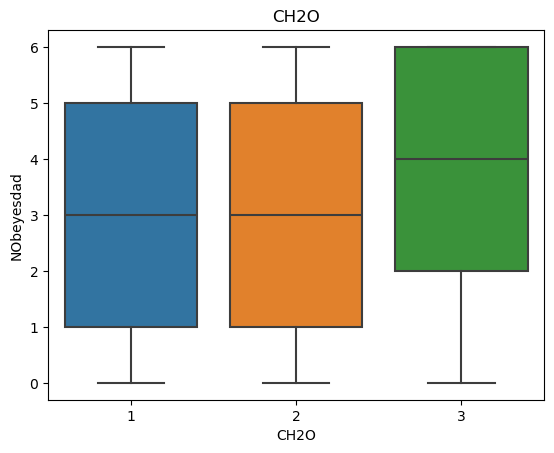

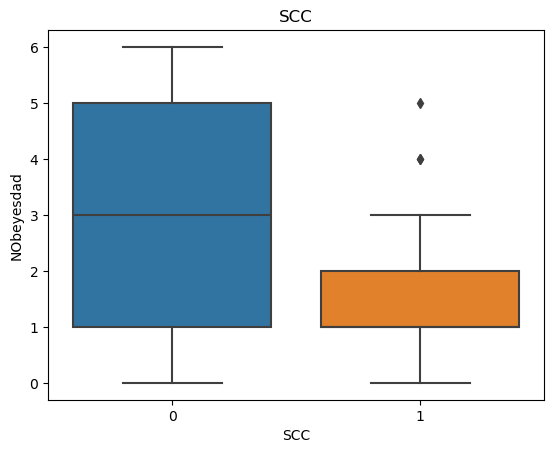

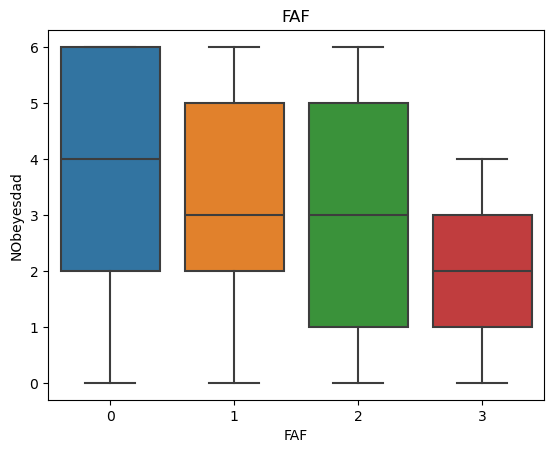

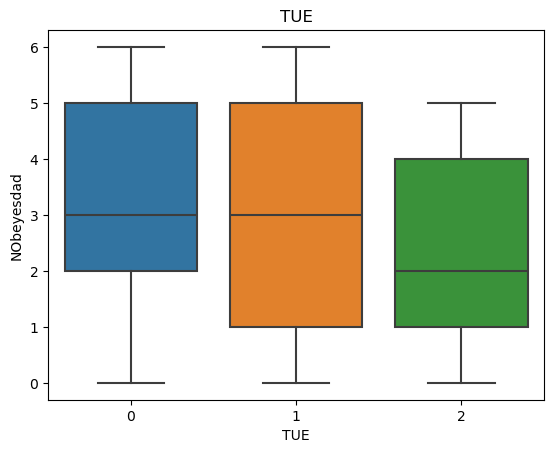

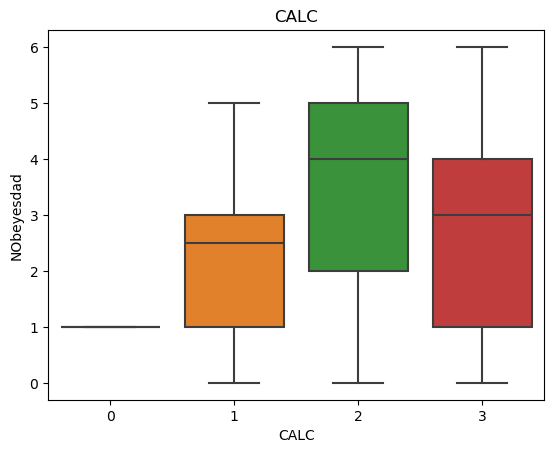

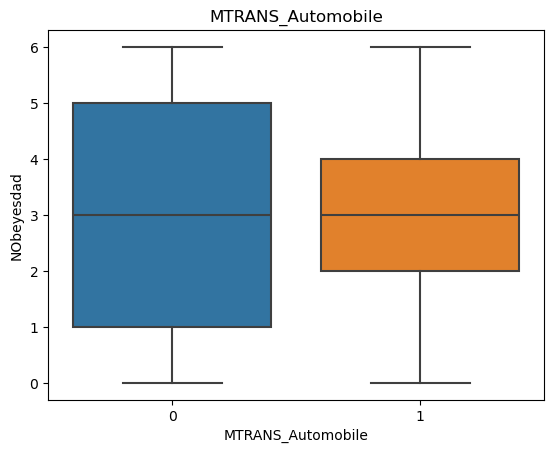

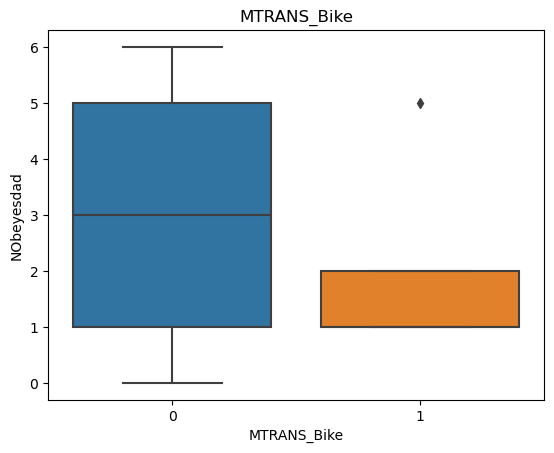

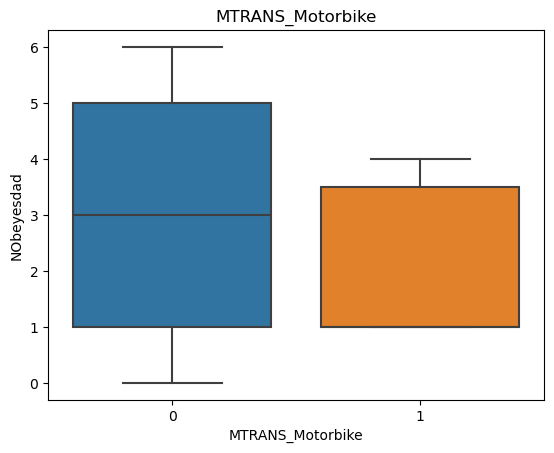

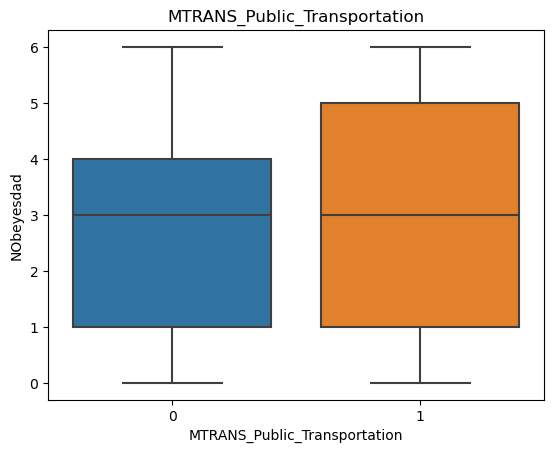

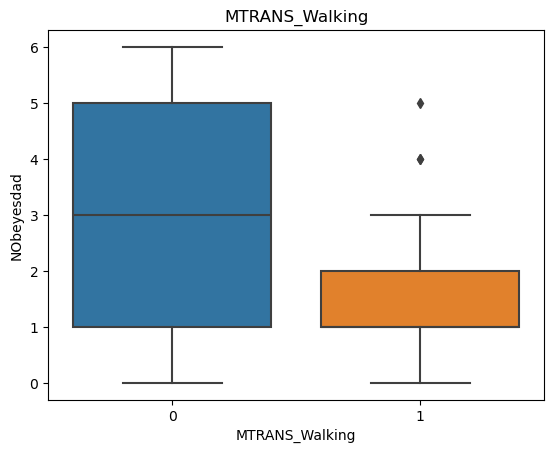

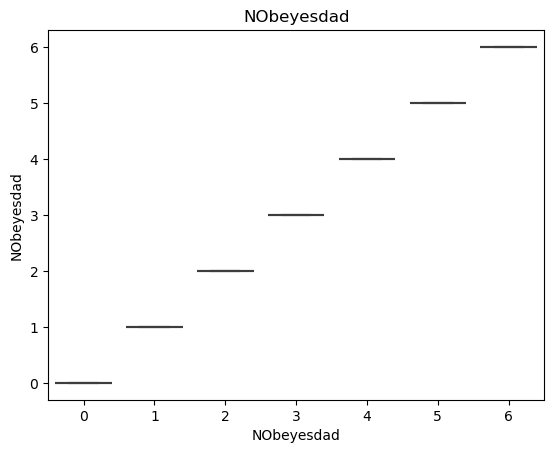

In [86]:
for col_name in df.columns:
    if df[col_name].dtype == "object" or len(df[col_name].unique())<10:
        sns.boxplot(x = col_name, y="NObeyesdad", data=df)
        plt.title(col_name)
        plt.show()
    else:
        sns.boxplot(df[col_name])
        plt.title(col_name)
        plt.show()

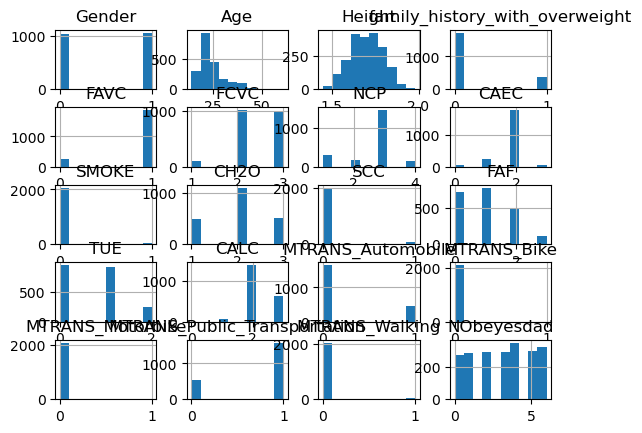

In [87]:
df.hist()
plt.show()

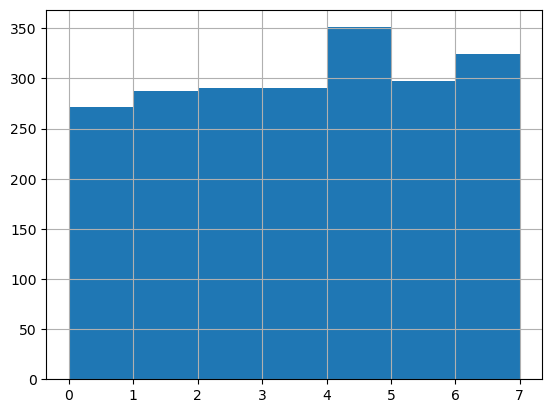

In [88]:
x = df["NObeyesdad"]
plt.hist(x, bins=range(8))
plt.grid()

## 2-2. 중복 데이터  확인하기 / 클래스 균형 확인

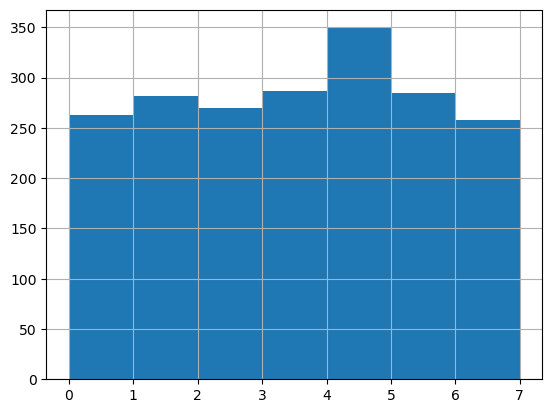

In [89]:
temp = df.drop_duplicates()
x = temp["NObeyesdad"]
plt.hist(x, bins=range(8))
plt.grid() # 삭제해도 target의 균등한 분포가 유지되니 삭제해도 될 듯

In [91]:
df = df.drop_duplicates()
df.head()

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,0,21,1.62,0,0,2,3,2,0,2,0,0,1,3,0,0,0,1,0,1
1,0,21,1.52,0,0,3,3,2,1,3,1,3,0,2,0,0,0,1,0,1
2,1,23,1.80,0,0,2,3,2,0,2,0,2,1,1,0,0,0,1,0,1
3,1,27,1.80,1,0,3,3,2,0,2,0,2,0,1,0,0,0,0,1,2
4,1,22,1.78,1,0,2,1,2,0,2,0,0,0,2,0,0,0,1,0,3


## 2-3 Scaling

In [125]:
# 스케일링 fit 전에 데이터 분리하기, 일단 K-fold 없이 
featureDF = df.iloc[:,:-1]
targetSR = df.iloc[:,-1]

from sklearn.model_selection import train_test_split # 분리
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2,
                                                                        stratify=targetSR,
                                                                         random_state = 42)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
def plot_hist(DF, col_list):
    for col in col_list:
        DF[col].hist()
        plt.title(col)
        plt.show()

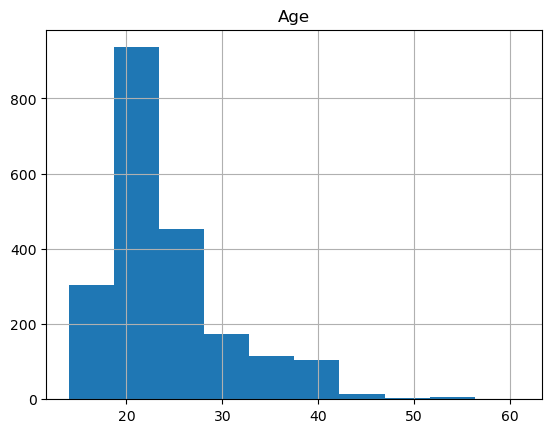

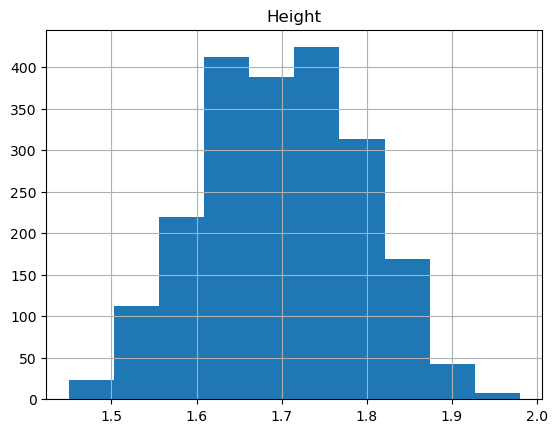

In [126]:
# 표준화전 
col_list = ["Age", "Height"]
plot_hist(featureDF, col_list)

In [128]:
from sklearn.preprocessing import StandardScaler # 평균 0 편차 1 표준화
Age_Stand = StandardScaler()
Height_Stand = StandardScaler()

Stand_X_train = X_train.copy()
Stand_X_test = X_test.copy()

Stand_X_train["Age"] = Age_Stand.fit_transform(X_train[["Age"]])
Stand_X_train["Height"] = Height_Stand.fit_transform(X_train[["Height"]])

Stand_X_test["Age"] = Age_Stand.transform(X_test[["Age"]])
Stand_X_test["Height"] = Height_Stand.transform(X_test[["Height"]])

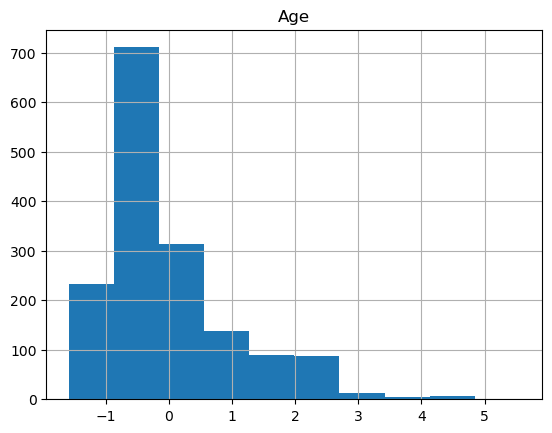

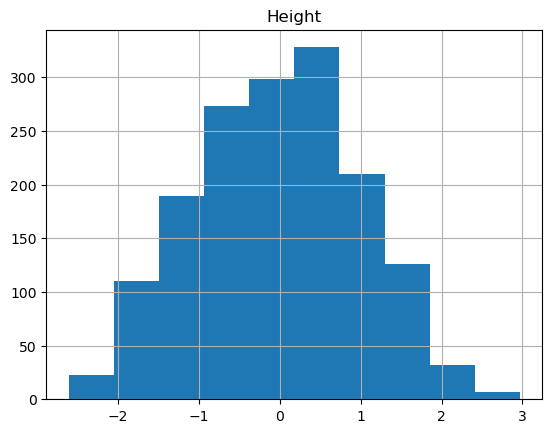

In [129]:
# 표준화 후
col_list = ["Age", "Height"]
plot_hist(Stand_X_train, col_list)

## 분류 모델

In [130]:
# 단독 모델
from sklearn.neighbors import KNeighborsClassifier # KNN 분류기
from sklearn.svm import SVC # Support Vector Classification
from sklearn.tree import DecisionTreeClassifier # DecisionTree

In [138]:
SVC_model = SVC()
SVC_model.fit(Stand_X_train, y_train)
SVC_model.score(Stand_X_train, y_train)

0.7261904761904762

In [139]:
KNN_model = KNeighborsClassifier()
SVC_model = SVC()
Tree_model = DecisionTreeClassifier()


model_list = [SVC_model, Tree_model]

for model in model_list:
    model.fit(Stand_X_train, y_train)
    print(model.score(Stand_X_train, y_train))
    print(model.score(Stand_X_test, y_test))

0.7261904761904762
0.7243107769423559
1.0
0.7744360902255639


In [144]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(Stand_X_train, y_train)
KNN_model.score(Stand_X_test, y_test)

AttributeError: 'Flags' object has no attribute 'c_contiguous'